In [1]:
#数据加载
import pandas as pd
import numpy as np
data=pd.read_csv("task1_data.csv")
data.head()

,x1,x2,y
0,46.4663,63.4143,1
1,43.5724,61.4890,1
2,41.4073,57.8710,1
3,40.4504,54.0086,1
4,37.3039,56.6732,1


In [2]:
X=data.drop(['y'],axis=1)
y=data.loc[:,'y']
X.head()

,x1,x2
0,46.4663,63.4143
1,43.5724,61.4890
2,41.4073,57.8710
3,40.4504,54.0086
4,37.3039,56.6732


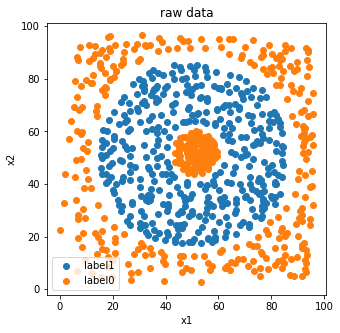

In [3]:
#数据可视化
from matplotlib import pyplot as plt
fig1=plt.figure(figsize=(5,5))
label1=plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1],label='label1')
label0=plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0],label='label0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('raw data')
plt.legend()
plt.show()


In [4]:
#数据分离
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,X.shape)

(630, 2) (158, 2) (788, 2)


In [5]:
#建立mlp模型
from keras.models import Sequential
from keras.layers import Dense,Activation

mlp = Sequential()
mlp.add(Dense(units=25, input_dim=2, activation='sigmoid'))
mlp.add(Dense(units=1,activation='sigmoid'))
mlp.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                75        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [6]:
#模型求解 参数配置
mlp.compile(optimizer='adam',loss='binary_crossentropy')

In [7]:
#模型训练
mlp.fit(X_train,y_train,epochs=1)

20/20 [==============================] - 12s 892us/step - loss: 0.7600


In [8]:
#训练数据 结果预测
y_train_predict = mlp.predict_classes(X_train)
print(y_train_predict)

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


In [9]:
#表现评估
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
print(accuracy_train)

0.6047619047619047


In [10]:
y_test_predict = mlp.predict_classes(X_test)
 
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.569620253164557


C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [11]:
#生成新的数据点用于画出决策边界
xx,yy = np.meshgrid(np.arange(0,100,1),np.arange(0,100,1))
x_range = np.c_[xx.ravel(),yy.ravel()]
print(x_range)

[[ 0  0]
 [ 1  0]
 [ 2  0]
 ...
 [97 99]
 [98 99]
 [99 99]]


In [12]:
#预测新生成数据点类别
y_range_predict = mlp.predict_classes(x_range)
print(y_range_predict)
print(type(y_range_predict))

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
<class 'numpy.ndarray'>


In [13]:
#预测结果数据类型转化
y_range_predict_format = pd.Series(i[0] for i in y_range_predict)
print(y_range_predict_format)
print(type(y_range_predict_format))

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Length: 10000, dtype: int32
<class 'pandas.core.series.Series'>


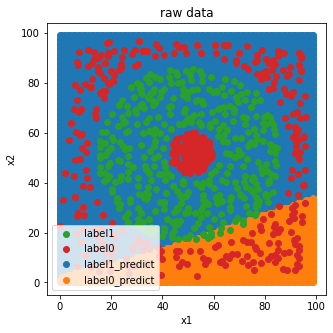

In [14]:
#数据可视化
fig2 = plt.figure(figsize=(5,5))
label1_predict = plt.scatter(x_range[:,0][y_range_predict_format==1],x_range[:,1][y_range_predict_format==1])
label0_predict = plt.scatter(x_range[:,0][y_range_predict_format==0],x_range[:,1][y_range_predict_format==0])



label1 = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
label0 = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
plt.legend((label1,label0,label1_predict,label0_predict),('label1','label0','label1_predict','label0_predict'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('raw data')
plt.show()

20/20 [==============================] - 0s 786us/step - loss: 0.6927


C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

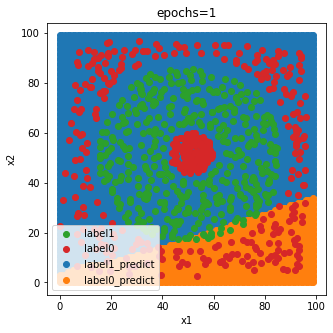

Epoch 1/500
20/20 [==============================] - 0s 682us/step - loss: 0.6545
Epoch 2/500
20/20 [==============================] - 0s 945us/step - loss: 0.6248
Epoch 3/500
20/20 [==============================] - 0s 682us/step - loss: 0.6124
Epoch 4/500
20/20 [==============================] - 0s 997us/step - loss: 0.6059
Epoch 5/500
20/20 [==============================] - 0s 945us/step - loss: 0.5963
Epoch 6/500
20/20 [==============================] - 0s 787us/step - loss: 0.5856
Epoch 7/500
20/20 [==============================] - 0s 788us/step - loss: 0.5803
Epoch 8/500
20/20 [==============================] - 0s 946us/step - loss: 0.5760
Epoch 9/500
20/20 [==============================] - 0s 892us/step - loss: 0.5713
Epoch 10/500
20/20 [==============================] - 0s 629us/step - loss: 0.5653
Epoch 11/500
20/20 [==============================] - 0s 786us/step - loss: 0.5584
Epoch 12/500
20/20 [==============================] - 0s 840us/step - loss: 0.5533
Epoch 13/500


20/20 [==============================] - 0s 630us/step - loss: 0.4509
Epoch 197/500
20/20 [==============================] - 0s 630us/step - loss: 0.4516
Epoch 198/500
20/20 [==============================] - 0s 681us/step - loss: 0.4521
Epoch 199/500
20/20 [==============================] - 0s 631us/step - loss: 0.4507
Epoch 200/500
20/20 [==============================] - 0s 682us/step - loss: 0.4519
Epoch 201/500
20/20 [==============================] - 0s 735us/step - loss: 0.4524
Epoch 202/500
20/20 [==============================] - 0s 682us/step - loss: 0.4512
Epoch 203/500
20/20 [==============================] - 0s 630us/step - loss: 0.4516
Epoch 204/500
20/20 [==============================] - 0s 630us/step - loss: 0.4519
Epoch 205/500
20/20 [==============================] - 0s 577us/step - loss: 0.4503
Epoch 206/500
20/20 [==============================] - 0s 525us/step - loss: 0.4506
Epoch 207/500
20/20 [==============================] - 0s 630us/step - loss: 0.4505
Epoch 

20/20 [==============================] - 0s 681us/step - loss: 0.4288
Epoch 391/500
20/20 [==============================] - 0s 682us/step - loss: 0.4288
Epoch 392/500
20/20 [==============================] - ETA: 0s - loss: 0.302 - 0s 630us/step - loss: 0.4288
Epoch 393/500
20/20 [==============================] - 0s 630us/step - loss: 0.4291
Epoch 394/500
20/20 [==============================] - 0s 630us/step - loss: 0.4282
Epoch 395/500
20/20 [==============================] - 0s 682us/step - loss: 0.4287
Epoch 396/500
20/20 [==============================] - 0s 631us/step - loss: 0.4279
Epoch 397/500
20/20 [==============================] - 0s 630us/step - loss: 0.4280
Epoch 398/500
20/20 [==============================] - 0s 577us/step - loss: 0.4277
Epoch 399/500
20/20 [==============================] - 0s 630us/step - loss: 0.4279
Epoch 400/500
20/20 [==============================] - 0s 630us/step - loss: 0.4287
Epoch 401/500
20/20 [==============================] - 0s 735us/st

20/20 [==============================] - 0s 788us/step - loss: 0.4242
Epoch 488/500
20/20 [==============================] - 0s 682us/step - loss: 0.4225
Epoch 489/500
20/20 [==============================] - 0s 735us/step - loss: 0.4229
Epoch 490/500
20/20 [==============================] - 0s 735us/step - loss: 0.4232
Epoch 491/500
20/20 [==============================] - 0s 892us/step - loss: 0.4226
Epoch 492/500
20/20 [==============================] - 0s 735us/step - loss: 0.4221
Epoch 493/500
20/20 [==============================] - 0s 734us/step - loss: 0.4227
Epoch 494/500
20/20 [==============================] - 0s 945us/step - loss: 0.4223
Epoch 495/500
20/20 [==============================] - 0s 840us/step - loss: 0.4224
Epoch 496/500
20/20 [==============================] - 0s 787us/step - loss: 0.4235
Epoch 497/500
20/20 [==============================] - 0s 787us/step - loss: 0.4233
Epoch 498/500
20/20 [==============================] - 0s 840us/step - loss: 0.4234
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

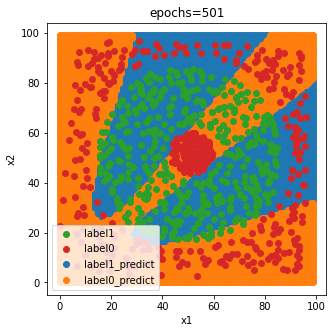

Epoch 1/500
20/20 [==============================] - 0s 787us/step - loss: 0.4221
Epoch 2/500
20/20 [==============================] - 0s 840us/step - loss: 0.4225
Epoch 3/500
20/20 [==============================] - 0s 786us/step - loss: 0.4215
Epoch 4/500
20/20 [==============================] - 0s 735us/step - loss: 0.4222
Epoch 5/500
20/20 [==============================] - 0s 733us/step - loss: 0.4217
Epoch 6/500
20/20 [==============================] - 0s 838us/step - loss: 0.4233
Epoch 7/500
20/20 [==============================] - 0s 684us/step - loss: 0.4213
Epoch 8/500
20/20 [==============================] - 0s 735us/step - loss: 0.4217
Epoch 9/500
20/20 [==============================] - 0s 734us/step - loss: 0.4220
Epoch 10/500
20/20 [==============================] - 0s 840us/step - loss: 0.4220
Epoch 11/500
20/20 [==============================] - 0s 840us/step - loss: 0.4221
Epoch 12/500
20/20 [==============================] - 0s 683us/step - loss: 0.4216
Epoch 13/500


20/20 [==============================] - 0s 681us/step - loss: 0.4095
Epoch 197/500
20/20 [==============================] - 0s 681us/step - loss: 0.4096
Epoch 198/500
20/20 [==============================] - 0s 630us/step - loss: 0.4095
Epoch 199/500
20/20 [==============================] - 0s 657us/step - loss: 0.4085
Epoch 200/500
20/20 [==============================] - 0s 735us/step - loss: 0.4091
Epoch 201/500
20/20 [==============================] - 0s 735us/step - loss: 0.4095
Epoch 202/500
20/20 [==============================] - 0s 630us/step - loss: 0.4087
Epoch 203/500
20/20 [==============================] - 0s 682us/step - loss: 0.4089
Epoch 204/500
20/20 [==============================] - 0s 682us/step - loss: 0.4097
Epoch 205/500
20/20 [==============================] - 0s 632us/step - loss: 0.4090
Epoch 206/500
20/20 [==============================] - 0s 735us/step - loss: 0.4088
Epoch 207/500
20/20 [==============================] - 0s 684us/step - loss: 0.4091
Epoch 

20/20 [==============================] - 0s 682us/step - loss: 0.3938
Epoch 391/500
20/20 [==============================] - 0s 630us/step - loss: 0.3950
Epoch 392/500
20/20 [==============================] - 0s 681us/step - loss: 0.3947
Epoch 393/500
20/20 [==============================] - 0s 630us/step - loss: 0.3934
Epoch 394/500
20/20 [==============================] - 0s 734us/step - loss: 0.3931
Epoch 395/500
20/20 [==============================] - 0s 852us/step - loss: 0.3929
Epoch 396/500
20/20 [==============================] - 0s 682us/step - loss: 0.3920
Epoch 397/500
20/20 [==============================] - 0s 577us/step - loss: 0.3933
Epoch 398/500
20/20 [==============================] - 0s 576us/step - loss: 0.3944
Epoch 399/500
20/20 [==============================] - 0s 630us/step - loss: 0.3920
Epoch 400/500
20/20 [==============================] - 0s 630us/step - loss: 0.3923
Epoch 401/500
20/20 [==============================] - 0s 630us/step - loss: 0.3916
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

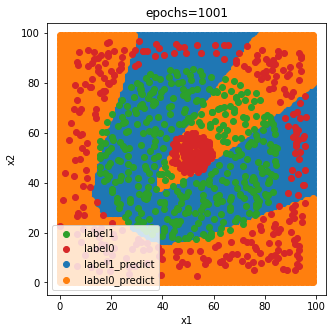

Epoch 1/500
20/20 [==============================] - 0s 682us/step - loss: 0.3720
Epoch 2/500
20/20 [==============================] - 0s 788us/step - loss: 0.3701
Epoch 3/500
20/20 [==============================] - 0s 734us/step - loss: 0.3695
Epoch 4/500
20/20 [==============================] - 0s 735us/step - loss: 0.3704
Epoch 5/500
20/20 [==============================] - 0s 682us/step - loss: 0.3707
Epoch 6/500
20/20 [==============================] - 0s 735us/step - loss: 0.3695
Epoch 7/500
20/20 [==============================] - 0s 734us/step - loss: 0.3707
Epoch 8/500
20/20 [==============================] - 0s 892us/step - loss: 0.3697
Epoch 9/500
20/20 [==============================] - 0s 735us/step - loss: 0.3698
Epoch 10/500
20/20 [==============================] - 0s 787us/step - loss: 0.3694
Epoch 11/500
20/20 [==============================] - 0s 682us/step - loss: 0.3680
Epoch 12/500
20/20 [==============================] - 0s 731us/step - loss: 0.3693
Epoch 13/500


20/20 [==============================] - 0s 788us/step - loss: 0.3480
Epoch 197/500
20/20 [==============================] - 0s 735us/step - loss: 0.3476
Epoch 198/500
20/20 [==============================] - 0s 682us/step - loss: 0.3459
Epoch 199/500
20/20 [==============================] - 0s 735us/step - loss: 0.3465
Epoch 200/500
20/20 [==============================] - 0s 682us/step - loss: 0.3476
Epoch 201/500
20/20 [==============================] - 0s 681us/step - loss: 0.3472
Epoch 202/500
20/20 [==============================] - 0s 630us/step - loss: 0.3466
Epoch 203/500
20/20 [==============================] - 0s 735us/step - loss: 0.3478
Epoch 204/500
20/20 [==============================] - 0s 787us/step - loss: 0.3461
Epoch 205/500
20/20 [==============================] - 0s 683us/step - loss: 0.3463
Epoch 206/500
20/20 [==============================] - 0s 735us/step - loss: 0.3460
Epoch 207/500
20/20 [==============================] - 0s 683us/step - loss: 0.3466
Epoch 

20/20 [==============================] - 0s 945us/step - loss: 0.3257
Epoch 391/500
20/20 [==============================] - 0s 735us/step - loss: 0.3265
Epoch 392/500
20/20 [==============================] - 0s 840us/step - loss: 0.3270
Epoch 393/500
20/20 [==============================] - 0s 682us/step - loss: 0.3264
Epoch 394/500
20/20 [==============================] - 0s 735us/step - loss: 0.3269
Epoch 395/500
20/20 [==============================] - 0s 735us/step - loss: 0.3268
Epoch 396/500
20/20 [==============================] - 0s 735us/step - loss: 0.3268
Epoch 397/500
20/20 [==============================] - 0s 682us/step - loss: 0.3260
Epoch 398/500
20/20 [==============================] - 0s 682us/step - loss: 0.3268
Epoch 399/500
20/20 [==============================] - 0s 630us/step - loss: 0.3280
Epoch 400/500
20/20 [==============================] - 0s 682us/step - loss: 0.3251
Epoch 401/500
20/20 [==============================] - 0s 631us/step - loss: 0.3246
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

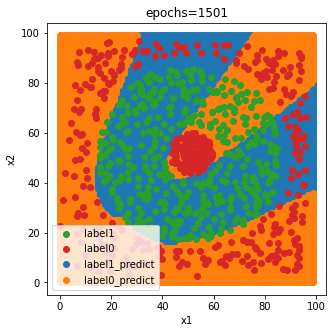

Epoch 1/500
20/20 [==============================] - 0s 683us/step - loss: 0.3193
Epoch 2/500
20/20 [==============================] - 0s 735us/step - loss: 0.3174
Epoch 3/500
20/20 [==============================] - 0s 682us/step - loss: 0.3181
Epoch 4/500
20/20 [==============================] - 0s 735us/step - loss: 0.3177
Epoch 5/500
20/20 [==============================] - 0s 681us/step - loss: 0.3182
Epoch 6/500
20/20 [==============================] - 0s 735us/step - loss: 0.3173
Epoch 7/500
20/20 [==============================] - 0s 735us/step - loss: 0.3187
Epoch 8/500
20/20 [==============================] - 0s 735us/step - loss: 0.3174
Epoch 9/500
20/20 [==============================] - 0s 682us/step - loss: 0.3169
Epoch 10/500
20/20 [==============================] - 0s 630us/step - loss: 0.3165
Epoch 11/500
20/20 [==============================] - 0s 682us/step - loss: 0.3165
Epoch 12/500
20/20 [==============================] - 0s 631us/step - loss: 0.3166
Epoch 13/500


20/20 [==============================] - 0s 682us/step - loss: 0.3025
Epoch 197/500
20/20 [==============================] - 0s 788us/step - loss: 0.3026
Epoch 198/500
20/20 [==============================] - 0s 735us/step - loss: 0.3009
Epoch 199/500
20/20 [==============================] - 0s 733us/step - loss: 0.3018
Epoch 200/500
20/20 [==============================] - 0s 630us/step - loss: 0.3027
Epoch 201/500
20/20 [==============================] - 0s 733us/step - loss: 0.3025
Epoch 202/500
20/20 [==============================] - 0s 682us/step - loss: 0.3024
Epoch 203/500
20/20 [==============================] - 0s 629us/step - loss: 0.3008
Epoch 204/500
20/20 [==============================] - 0s 682us/step - loss: 0.3029
Epoch 205/500
20/20 [==============================] - 0s 682us/step - loss: 0.3008
Epoch 206/500
20/20 [==============================] - 0s 681us/step - loss: 0.3034
Epoch 207/500
20/20 [==============================] - 0s 682us/step - loss: 0.3009
Epoch 

20/20 [==============================] - 0s 630us/step - loss: 0.2890
Epoch 391/500
20/20 [==============================] - 0s 579us/step - loss: 0.2883
Epoch 392/500
20/20 [==============================] - 0s 629us/step - loss: 0.2873
Epoch 393/500
20/20 [==============================] - 0s 630us/step - loss: 0.2899
Epoch 394/500
20/20 [==============================] - 0s 576us/step - loss: 0.2877
Epoch 395/500
20/20 [==============================] - 0s 577us/step - loss: 0.2879
Epoch 396/500
20/20 [==============================] - 0s 630us/step - loss: 0.2892
Epoch 397/500
20/20 [==============================] - 0s 630us/step - loss: 0.2875
Epoch 398/500
20/20 [==============================] - 0s 840us/step - loss: 0.2870
Epoch 399/500
20/20 [==============================] - 0s 681us/step - loss: 0.2878
Epoch 400/500
20/20 [==============================] - 0s 525us/step - loss: 0.2866
Epoch 401/500
20/20 [==============================] - 0s 630us/step - loss: 0.2871
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

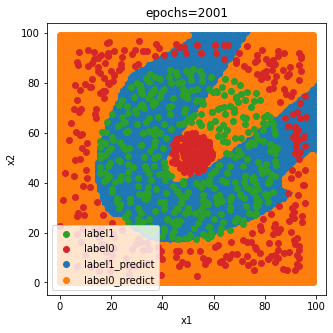

Epoch 1/500
20/20 [==============================] - 0s 735us/step - loss: 0.2829
Epoch 2/500
20/20 [==============================] - 0s 682us/step - loss: 0.2818
Epoch 3/500
20/20 [==============================] - 0s 630us/step - loss: 0.2813
Epoch 4/500
20/20 [==============================] - 0s 684us/step - loss: 0.2809
Epoch 5/500
20/20 [==============================] - 0s 577us/step - loss: 0.2816
Epoch 6/500
20/20 [==============================] - 0s 735us/step - loss: 0.2820
Epoch 7/500
20/20 [==============================] - 0s 733us/step - loss: 0.2813
Epoch 8/500
20/20 [==============================] - 0s 735us/step - loss: 0.2826
Epoch 9/500
20/20 [==============================] - 0s 579us/step - loss: 0.2800
Epoch 10/500
20/20 [==============================] - 0s 681us/step - loss: 0.2802
Epoch 11/500
20/20 [==============================] - 0s 735us/step - loss: 0.2823
Epoch 12/500
20/20 [==============================] - 0s 787us/step - loss: 0.2807
Epoch 13/500


20/20 [==============================] - 0s 734us/step - loss: 0.2749
Epoch 197/500
20/20 [==============================] - 0s 683us/step - loss: 0.2721
Epoch 198/500
20/20 [==============================] - 0s 630us/step - loss: 0.2718
Epoch 199/500
20/20 [==============================] - 0s 682us/step - loss: 0.2723
Epoch 200/500
20/20 [==============================] - 0s 682us/step - loss: 0.2716
Epoch 201/500
20/20 [==============================] - 0s 630us/step - loss: 0.2723
Epoch 202/500
20/20 [==============================] - 0s 683us/step - loss: 0.2711
Epoch 203/500
20/20 [==============================] - 0s 682us/step - loss: 0.2706
Epoch 204/500
20/20 [==============================] - 0s 630us/step - loss: 0.2724
Epoch 205/500
20/20 [==============================] - 0s 682us/step - loss: 0.2723
Epoch 206/500
20/20 [==============================] - 0s 733us/step - loss: 0.2713
Epoch 207/500
20/20 [==============================] - 0s 681us/step - loss: 0.2709
Epoch 

20/20 [==============================] - 0s 630us/step - loss: 0.2650
Epoch 391/500
20/20 [==============================] - 0s 735us/step - loss: 0.2650
Epoch 392/500
20/20 [==============================] - 0s 630us/step - loss: 0.2654
Epoch 393/500
20/20 [==============================] - 0s 682us/step - loss: 0.2638
Epoch 394/500
20/20 [==============================] - 0s 630us/step - loss: 0.2650
Epoch 395/500
20/20 [==============================] - 0s 630us/step - loss: 0.2634
Epoch 396/500
20/20 [==============================] - 0s 629us/step - loss: 0.2631
Epoch 397/500
20/20 [==============================] - 0s 630us/step - loss: 0.2633
Epoch 398/500
20/20 [==============================] - 0s 681us/step - loss: 0.2628
Epoch 399/500
20/20 [==============================] - 0s 630us/step - loss: 0.2626
Epoch 400/500
20/20 [==============================] - 0s 786us/step - loss: 0.2626
Epoch 401/500
20/20 [==============================] - 0s 630us/step - loss: 0.2627
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

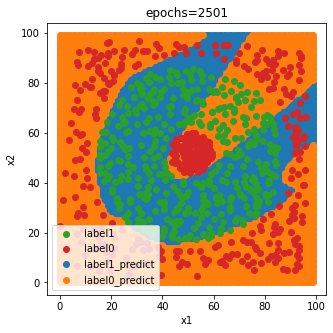

Epoch 1/500
20/20 [==============================] - 0s 787us/step - loss: 0.2586
Epoch 2/500
20/20 [==============================] - 0s 682us/step - loss: 0.2606
Epoch 3/500
20/20 [==============================] - 0s 682us/step - loss: 0.2585
Epoch 4/500
20/20 [==============================] - 0s 735us/step - loss: 0.2573
Epoch 5/500
20/20 [==============================] - 0s 682us/step - loss: 0.2576
Epoch 6/500
20/20 [==============================] - 0s 682us/step - loss: 0.2575
Epoch 7/500
20/20 [==============================] - 0s 629us/step - loss: 0.2575
Epoch 8/500
20/20 [==============================] - 0s 734us/step - loss: 0.2574
Epoch 9/500
20/20 [==============================] - 0s 683us/step - loss: 0.2602
Epoch 10/500
20/20 [==============================] - 0s 579us/step - loss: 0.2605
Epoch 11/500
20/20 [==============================] - 0s 735us/step - loss: 0.2609
Epoch 12/500
20/20 [==============================] - 0s 682us/step - loss: 0.2582
Epoch 13/500


Epoch 99/500
20/20 [==============================] - 0s 630us/step - loss: 0.2541
Epoch 100/500
20/20 [==============================] - 0s 682us/step - loss: 0.2554
Epoch 101/500
20/20 [==============================] - 0s 630us/step - loss: 0.2553
Epoch 102/500
20/20 [==============================] - 0s 682us/step - loss: 0.2561
Epoch 103/500
20/20 [==============================] - 0s 630us/step - loss: 0.2562
Epoch 104/500
20/20 [==============================] - 0s 681us/step - loss: 0.2550
Epoch 105/500
20/20 [==============================] - 0s 681us/step - loss: 0.2543
Epoch 106/500
20/20 [==============================] - 0s 735us/step - loss: 0.2527
Epoch 107/500
20/20 [==============================] - 0s 629us/step - loss: 0.2540
Epoch 108/500
20/20 [==============================] - 0s 735us/step - loss: 0.2547
Epoch 109/500
20/20 [==============================] - 0s 734us/step - loss: 0.2538
Epoch 110/500
20/20 [==============================] - 0s 682us/step - loss: 

20/20 [==============================] - 0s 630us/step - loss: 0.2436
Epoch 294/500
20/20 [==============================] - 0s 630us/step - loss: 0.2440
Epoch 295/500
20/20 [==============================] - 0s 628us/step - loss: 0.2449
Epoch 296/500
20/20 [==============================] - 0s 630us/step - loss: 0.2437
Epoch 297/500
20/20 [==============================] - 0s 629us/step - loss: 0.2439
Epoch 298/500
20/20 [==============================] - 0s 577us/step - loss: 0.2448
Epoch 299/500
20/20 [==============================] - 0s 577us/step - loss: 0.2438
Epoch 300/500
20/20 [==============================] - 0s 631us/step - loss: 0.2436
Epoch 301/500
20/20 [==============================] - 0s 629us/step - loss: 0.2433
Epoch 302/500
20/20 [==============================] - 0s 631us/step - loss: 0.2425
Epoch 303/500
20/20 [==============================] - 0s 577us/step - loss: 0.2457
Epoch 304/500
20/20 [==============================] - 0s 727us/step - loss: 0.2439
Epoch 

20/20 [==============================] - 0s 525us/step - loss: 0.2319
Epoch 488/500
20/20 [==============================] - 0s 524us/step - loss: 0.2320
Epoch 489/500
20/20 [==============================] - 0s 577us/step - loss: 0.2329
Epoch 490/500
20/20 [==============================] - 0s 577us/step - loss: 0.2310
Epoch 491/500
20/20 [==============================] - 0s 577us/step - loss: 0.2322
Epoch 492/500
20/20 [==============================] - 0s 630us/step - loss: 0.2314
Epoch 493/500
20/20 [==============================] - 0s 577us/step - loss: 0.2318
Epoch 494/500
20/20 [==============================] - 0s 629us/step - loss: 0.2311
Epoch 495/500
20/20 [==============================] - 0s 682us/step - loss: 0.2306
Epoch 496/500
20/20 [==============================] - 0s 683us/step - loss: 0.2325
Epoch 497/500
20/20 [==============================] - 0s 630us/step - loss: 0.2294
Epoch 498/500
20/20 [==============================] - 0s 577us/step - loss: 0.2312
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

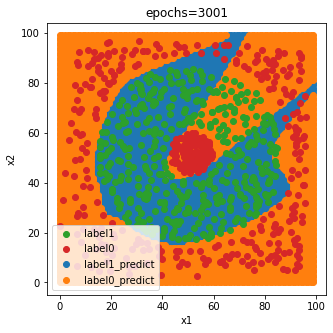

Epoch 1/500
20/20 [==============================] - 0s 787us/step - loss: 0.2319
Epoch 2/500
20/20 [==============================] - 0s 684us/step - loss: 0.2299
Epoch 3/500
20/20 [==============================] - 0s 631us/step - loss: 0.2313
Epoch 4/500
20/20 [==============================] - 0s 681us/step - loss: 0.2314
Epoch 5/500
20/20 [==============================] - 0s 628us/step - loss: 0.2306
Epoch 6/500
20/20 [==============================] - 0s 578us/step - loss: 0.2302
Epoch 7/500
20/20 [==============================] - 0s 630us/step - loss: 0.2299
Epoch 8/500
20/20 [==============================] - 0s 682us/step - loss: 0.2316
Epoch 9/500
20/20 [==============================] - 0s 630us/step - loss: 0.2321
Epoch 10/500
20/20 [==============================] - 0s 630us/step - loss: 0.2287
Epoch 11/500
20/20 [==============================] - 0s 525us/step - loss: 0.2285
Epoch 12/500
20/20 [==============================] - 0s 577us/step - loss: 0.2292
Epoch 13/500


20/20 [==============================] - 0s 577us/step - loss: 0.2216
Epoch 197/500
20/20 [==============================] - 0s 630us/step - loss: 0.2212
Epoch 198/500
20/20 [==============================] - 0s 630us/step - loss: 0.2222
Epoch 199/500
20/20 [==============================] - 0s 627us/step - loss: 0.2238
Epoch 200/500
20/20 [==============================] - 0s 734us/step - loss: 0.2237
Epoch 201/500
20/20 [==============================] - 0s 630us/step - loss: 0.2212
Epoch 202/500
20/20 [==============================] - 0s 631us/step - loss: 0.2196
Epoch 203/500
20/20 [==============================] - 0s 682us/step - loss: 0.2264
Epoch 204/500
20/20 [==============================] - 0s 628us/step - loss: 0.2223
Epoch 205/500
20/20 [==============================] - 0s 628us/step - loss: 0.2223
Epoch 206/500
20/20 [==============================] - 0s 628us/step - loss: 0.2214
Epoch 207/500
20/20 [==============================] - 0s 577us/step - loss: 0.2217
Epoch 

20/20 [==============================] - 0s 681us/step - loss: 0.2164
Epoch 391/500
20/20 [==============================] - 0s 630us/step - loss: 0.2163
Epoch 392/500
20/20 [==============================] - 0s 684us/step - loss: 0.2156
Epoch 393/500
20/20 [==============================] - 0s 682us/step - loss: 0.2148
Epoch 394/500
20/20 [==============================] - 0s 629us/step - loss: 0.2143
Epoch 395/500
20/20 [==============================] - 0s 684us/step - loss: 0.2129
Epoch 396/500
20/20 [==============================] - 0s 683us/step - loss: 0.2117
Epoch 397/500
20/20 [==============================] - 0s 734us/step - loss: 0.2143
Epoch 398/500
20/20 [==============================] - 0s 525us/step - loss: 0.2127
Epoch 399/500
20/20 [==============================] - 0s 630us/step - loss: 0.2153
Epoch 400/500
20/20 [==============================] - 0s 683us/step - loss: 0.2123
Epoch 401/500
20/20 [==============================] - 0s 681us/step - loss: 0.2163
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

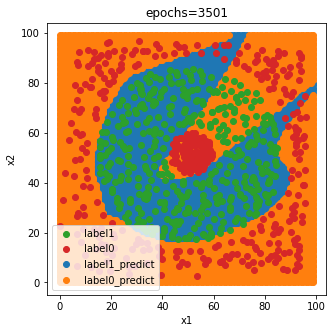

Epoch 1/500
20/20 [==============================] - 0s 840us/step - loss: 0.2114
Epoch 2/500
20/20 [==============================] - 0s 735us/step - loss: 0.2110
Epoch 3/500
20/20 [==============================] - 0s 682us/step - loss: 0.2096
Epoch 4/500
20/20 [==============================] - 0s 682us/step - loss: 0.2115
Epoch 5/500
20/20 [==============================] - 0s 787us/step - loss: 0.2095
Epoch 6/500
20/20 [==============================] - 0s 735us/step - loss: 0.2076
Epoch 7/500
20/20 [==============================] - 0s 735us/step - loss: 0.2103
Epoch 8/500
20/20 [==============================] - 0s 684us/step - loss: 0.2088
Epoch 9/500
20/20 [==============================] - 0s 787us/step - loss: 0.2109
Epoch 10/500
20/20 [==============================] - 0s 735us/step - loss: 0.2079
Epoch 11/500
20/20 [==============================] - 0s 789us/step - loss: 0.2098
Epoch 12/500
20/20 [==============================] - 0s 736us/step - loss: 0.2108
Epoch 13/500


20/20 [==============================] - 0s 737us/step - loss: 0.2004
Epoch 197/500
20/20 [==============================] - 0s 578us/step - loss: 0.1988
Epoch 198/500
20/20 [==============================] - 0s 681us/step - loss: 0.2018
Epoch 199/500
20/20 [==============================] - 0s 631us/step - loss: 0.2008
Epoch 200/500
20/20 [==============================] - 0s 630us/step - loss: 0.2004
Epoch 201/500
20/20 [==============================] - 0s 629us/step - loss: 0.2009
Epoch 202/500
20/20 [==============================] - 0s 682us/step - loss: 0.2026
Epoch 203/500
20/20 [==============================] - 0s 630us/step - loss: 0.2019
Epoch 204/500
20/20 [==============================] - 0s 630us/step - loss: 0.2013
Epoch 205/500
20/20 [==============================] - 0s 630us/step - loss: 0.2022
Epoch 206/500
20/20 [==============================] - 0s 577us/step - loss: 0.2009
Epoch 207/500
20/20 [==============================] - 0s 631us/step - loss: 0.1991
Epoch 

20/20 [==============================] - 0s 577us/step - loss: 0.1903
Epoch 391/500
20/20 [==============================] - 0s 630us/step - loss: 0.1895
Epoch 392/500
20/20 [==============================] - 0s 577us/step - loss: 0.1914
Epoch 393/500
20/20 [==============================] - 0s 577us/step - loss: 0.1911
Epoch 394/500
20/20 [==============================] - 0s 577us/step - loss: 0.1889
Epoch 395/500
20/20 [==============================] - 0s 525us/step - loss: 0.1907
Epoch 396/500
20/20 [==============================] - 0s 579us/step - loss: 0.1902
Epoch 397/500
20/20 [==============================] - 0s 629us/step - loss: 0.1879
Epoch 398/500
20/20 [==============================] - 0s 681us/step - loss: 0.1925
Epoch 399/500
20/20 [==============================] - 0s 681us/step - loss: 0.1904
Epoch 400/500
20/20 [==============================] - 0s 630us/step - loss: 0.1905
Epoch 401/500
20/20 [==============================] - 0s 630us/step - loss: 0.1915
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

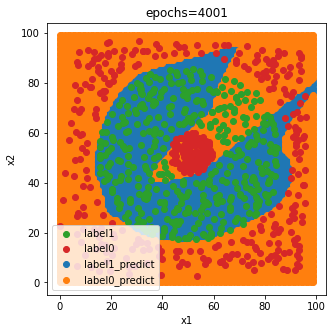

Epoch 1/500
20/20 [==============================] - 0s 683us/step - loss: 0.1922
Epoch 2/500
20/20 [==============================] - 0s 630us/step - loss: 0.1858
Epoch 3/500
20/20 [==============================] - 0s 576us/step - loss: 0.1847
Epoch 4/500
20/20 [==============================] - 0s 682us/step - loss: 0.1851
Epoch 5/500
20/20 [==============================] - 0s 682us/step - loss: 0.1848
Epoch 6/500
20/20 [==============================] - 0s 631us/step - loss: 0.1831
Epoch 7/500
20/20 [==============================] - 0s 577us/step - loss: 0.1849
Epoch 8/500
20/20 [==============================] - 0s 682us/step - loss: 0.1838
Epoch 9/500
20/20 [==============================] - 0s 682us/step - loss: 0.1876
Epoch 10/500
20/20 [==============================] - 0s 576us/step - loss: 0.1860
Epoch 11/500
20/20 [==============================] - 0s 577us/step - loss: 0.1893
Epoch 12/500
20/20 [==============================] - 0s 681us/step - loss: 0.1831
Epoch 13/500


20/20 [==============================] - 0s 681us/step - loss: 0.1754
Epoch 197/500
20/20 [==============================] - 0s 683us/step - loss: 0.1722
Epoch 198/500
20/20 [==============================] - 0s 630us/step - loss: 0.1734
Epoch 199/500
20/20 [==============================] - 0s 682us/step - loss: 0.1740
Epoch 200/500
20/20 [==============================] - 0s 630us/step - loss: 0.1741
Epoch 201/500
20/20 [==============================] - 0s 577us/step - loss: 0.1765
Epoch 202/500
20/20 [==============================] - 0s 682us/step - loss: 0.1776
Epoch 203/500
20/20 [==============================] - 0s 682us/step - loss: 0.1736
Epoch 204/500
20/20 [==============================] - 0s 735us/step - loss: 0.1727
Epoch 205/500
20/20 [==============================] - 0s 682us/step - loss: 0.1737
Epoch 206/500
20/20 [==============================] - 0s 664us/step - loss: 0.1732
Epoch 207/500
20/20 [==============================] - 0s 682us/step - loss: 0.1736
Epoch 

20/20 [==============================] - 0s 683us/step - loss: 0.1703
Epoch 294/500
20/20 [==============================] - 0s 682us/step - loss: 0.1689
Epoch 295/500
20/20 [==============================] - 0s 682us/step - loss: 0.1699
Epoch 296/500
20/20 [==============================] - 0s 682us/step - loss: 0.1680
Epoch 297/500
20/20 [==============================] - 0s 682us/step - loss: 0.1694
Epoch 298/500
20/20 [==============================] - 0s 734us/step - loss: 0.1722
Epoch 299/500
20/20 [==============================] - 0s 630us/step - loss: 0.1696
Epoch 300/500
20/20 [==============================] - 0s 682us/step - loss: 0.1787
Epoch 301/500
20/20 [==============================] - 0s 630us/step - loss: 0.1678
Epoch 302/500
20/20 [==============================] - 0s 630us/step - loss: 0.1688
Epoch 303/500
20/20 [==============================] - 0s 735us/step - loss: 0.1681
Epoch 304/500
20/20 [==============================] - 0s 630us/step - loss: 0.1670
Epoch 

20/20 [==============================] - 0s 735us/step - loss: 0.1600
Epoch 488/500
20/20 [==============================] - 0s 630us/step - loss: 0.1566
Epoch 489/500
20/20 [==============================] - 0s 788us/step - loss: 0.1585
Epoch 490/500
20/20 [==============================] - 0s 629us/step - loss: 0.1575
Epoch 491/500
20/20 [==============================] - 0s 787us/step - loss: 0.1575
Epoch 492/500
20/20 [==============================] - 0s 840us/step - loss: 0.1628
Epoch 493/500
20/20 [==============================] - 0s 788us/step - loss: 0.1570
Epoch 494/500
20/20 [==============================] - 0s 682us/step - loss: 0.1596
Epoch 495/500
20/20 [==============================] - 0s 735us/step - loss: 0.1564
Epoch 496/500
20/20 [==============================] - 0s 840us/step - loss: 0.1580
Epoch 497/500
20/20 [==============================] - 0s 892us/step - loss: 0.1576
Epoch 498/500
20/20 [==============================] - 0s 840us/step - loss: 0.1577
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

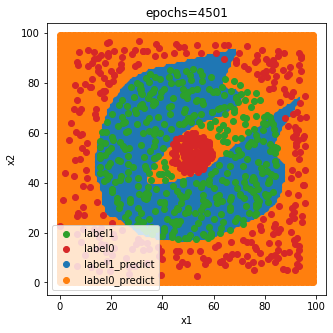

Epoch 1/500
20/20 [==============================] - 0s 840us/step - loss: 0.1562
Epoch 2/500
20/20 [==============================] - 0s 892us/step - loss: 0.1582
Epoch 3/500
20/20 [==============================] - 0s 893us/step - loss: 0.1564
Epoch 4/500
20/20 [==============================] - 0s 787us/step - loss: 0.1592
Epoch 5/500
20/20 [==============================] - 0s 838us/step - loss: 0.1546
Epoch 6/500
20/20 [==============================] - 0s 682us/step - loss: 0.1557
Epoch 7/500
20/20 [==============================] - 0s 787us/step - loss: 0.1573
Epoch 8/500
20/20 [==============================] - 0s 735us/step - loss: 0.1560
Epoch 9/500
20/20 [==============================] - 0s 842us/step - loss: 0.1590
Epoch 10/500
20/20 [==============================] - 0s 630us/step - loss: 0.1578
Epoch 11/500
20/20 [==============================] - 0s 839us/step - loss: 0.1546
Epoch 12/500
20/20 [==============================] - 0s 681us/step - loss: 0.1547
Epoch 13/500


20/20 [==============================] - 0s 734us/step - loss: 0.1419
Epoch 197/500
20/20 [==============================] - 0s 682us/step - loss: 0.1451
Epoch 198/500
20/20 [==============================] - 0s 735us/step - loss: 0.1427
Epoch 199/500
20/20 [==============================] - 0s 577us/step - loss: 0.1441
Epoch 200/500
20/20 [==============================] - 0s 736us/step - loss: 0.1433
Epoch 201/500
20/20 [==============================] - 0s 658us/step - loss: 0.1456
Epoch 202/500
20/20 [==============================] - 0s 682us/step - loss: 0.1458
Epoch 203/500
20/20 [==============================] - 0s 680us/step - loss: 0.1459
Epoch 204/500
20/20 [==============================] - 0s 681us/step - loss: 0.1429
Epoch 205/500
20/20 [==============================] - 0s 682us/step - loss: 0.1439
Epoch 206/500
20/20 [==============================] - 0s 736us/step - loss: 0.1441
Epoch 207/500
20/20 [==============================] - 0s 683us/step - loss: 0.1456
Epoch 

20/20 [==============================] - 0s 630us/step - loss: 0.1313
Epoch 391/500
20/20 [==============================] - 0s 682us/step - loss: 0.1322
Epoch 392/500
20/20 [==============================] - 0s 682us/step - loss: 0.1320
Epoch 393/500
20/20 [==============================] - 0s 577us/step - loss: 0.1319
Epoch 394/500
20/20 [==============================] - 0s 684us/step - loss: 0.1323
Epoch 395/500
20/20 [==============================] - 0s 735us/step - loss: 0.1355
Epoch 396/500
20/20 [==============================] - 0s 682us/step - loss: 0.1352
Epoch 397/500
20/20 [==============================] - 0s 682us/step - loss: 0.1322
Epoch 398/500
20/20 [==============================] - 0s 734us/step - loss: 0.1326
Epoch 399/500
20/20 [==============================] - 0s 734us/step - loss: 0.1304
Epoch 400/500
20/20 [==============================] - 0s 630us/step - loss: 0.1303
Epoch 401/500
20/20 [==============================] - 0s 577us/step - loss: 0.1337
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

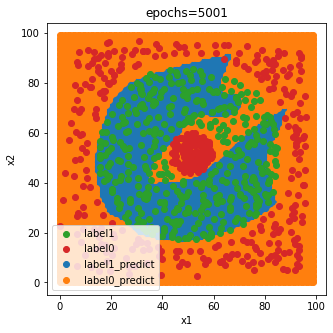

Epoch 1/500
20/20 [==============================] - 0s 789us/step - loss: 0.1267
Epoch 2/500
20/20 [==============================] - 0s 787us/step - loss: 0.1259
Epoch 3/500
20/20 [==============================] - 0s 787us/step - loss: 0.1262
Epoch 4/500
20/20 [==============================] - 0s 735us/step - loss: 0.1255
Epoch 5/500
20/20 [==============================] - 0s 682us/step - loss: 0.1235
Epoch 6/500
20/20 [==============================] - 0s 630us/step - loss: 0.1279
Epoch 7/500
20/20 [==============================] - 0s 735us/step - loss: 0.1303
Epoch 8/500
20/20 [==============================] - 0s 787us/step - loss: 0.1282
Epoch 9/500
20/20 [==============================] - 0s 684us/step - loss: 0.1243
Epoch 10/500
20/20 [==============================] - 0s 682us/step - loss: 0.1303
Epoch 11/500
20/20 [==============================] - 0s 736us/step - loss: 0.1248
Epoch 12/500
20/20 [==============================] - 0s 735us/step - loss: 0.1235
Epoch 13/500


20/20 [==============================] - 0s 681us/step - loss: 0.1106
Epoch 197/500
20/20 [==============================] - 0s 629us/step - loss: 0.1162
Epoch 198/500
20/20 [==============================] - 0s 735us/step - loss: 0.1158
Epoch 199/500
20/20 [==============================] - 0s 682us/step - loss: 0.1138
Epoch 200/500
20/20 [==============================] - 0s 683us/step - loss: 0.1143
Epoch 201/500
20/20 [==============================] - 0s 681us/step - loss: 0.1107
Epoch 202/500
20/20 [==============================] - 0s 841us/step - loss: 0.1124
Epoch 203/500
20/20 [==============================] - 0s 630us/step - loss: 0.1117
Epoch 204/500
20/20 [==============================] - 0s 629us/step - loss: 0.1097
Epoch 205/500
20/20 [==============================] - 0s 631us/step - loss: 0.1103
Epoch 206/500
20/20 [==============================] - 0s 682us/step - loss: 0.1189
Epoch 207/500
20/20 [==============================] - 0s 682us/step - loss: 0.1122
Epoch 

20/20 [==============================] - 0s 682us/step - loss: 0.1046
Epoch 391/500
20/20 [==============================] - 0s 631us/step - loss: 0.1040
Epoch 392/500
20/20 [==============================] - 0s 682us/step - loss: 0.1015
Epoch 393/500
20/20 [==============================] - 0s 682us/step - loss: 0.1021
Epoch 394/500
20/20 [==============================] - 0s 796us/step - loss: 0.1003
Epoch 395/500
20/20 [==============================] - 0s 683us/step - loss: 0.1012
Epoch 396/500
20/20 [==============================] - 0s 682us/step - loss: 0.1010
Epoch 397/500
20/20 [==============================] - 0s 682us/step - loss: 0.0993
Epoch 398/500
20/20 [==============================] - 0s 734us/step - loss: 0.0992
Epoch 399/500
20/20 [==============================] - 0s 840us/step - loss: 0.1033
Epoch 400/500
20/20 [==============================] - 0s 892us/step - loss: 0.1072
Epoch 401/500
20/20 [==============================] - 0s 735us/step - loss: 0.0997
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

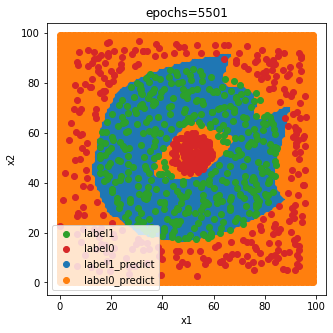

Epoch 1/500
20/20 [==============================] - 0s 735us/step - loss: 0.0943
Epoch 2/500
20/20 [==============================] - 0s 735us/step - loss: 0.0955
Epoch 3/500
20/20 [==============================] - 0s 735us/step - loss: 0.0987
Epoch 4/500
20/20 [==============================] - 0s 630us/step - loss: 0.0963
Epoch 5/500
20/20 [==============================] - 0s 735us/step - loss: 0.0946
Epoch 6/500
20/20 [==============================] - 0s 682us/step - loss: 0.0945
Epoch 7/500
20/20 [==============================] - 0s 682us/step - loss: 0.0936
Epoch 8/500
20/20 [==============================] - 0s 631us/step - loss: 0.0952
Epoch 9/500
20/20 [==============================] - 0s 682us/step - loss: 0.0930
Epoch 10/500
20/20 [==============================] - 0s 787us/step - loss: 0.0940
Epoch 11/500
20/20 [==============================] - 0s 682us/step - loss: 0.0939
Epoch 12/500
20/20 [==============================] - 0s 682us/step - loss: 0.0968
Epoch 13/500


20/20 [==============================] - 0s 579us/step - loss: 0.0845
Epoch 197/500
20/20 [==============================] - 0s 660us/step - loss: 0.0841
Epoch 198/500
20/20 [==============================] - 0s 682us/step - loss: 0.0858
Epoch 199/500
20/20 [==============================] - 0s 786us/step - loss: 0.0860
Epoch 200/500
20/20 [==============================] - 0s 787us/step - loss: 0.0842
Epoch 201/500
20/20 [==============================] - 0s 733us/step - loss: 0.0840
Epoch 202/500
20/20 [==============================] - 0s 630us/step - loss: 0.0858
Epoch 203/500
20/20 [==============================] - 0s 681us/step - loss: 0.0832
Epoch 204/500
20/20 [==============================] - 0s 577us/step - loss: 0.0883
Epoch 205/500
20/20 [==============================] - 0s 736us/step - loss: 0.0842
Epoch 206/500
20/20 [==============================] - 0s 682us/step - loss: 0.0820
Epoch 207/500
20/20 [==============================] - 0s 734us/step - loss: 0.0832
Epoch 

20/20 [==============================] - 0s 577us/step - loss: 0.0755
Epoch 391/500
20/20 [==============================] - 0s 682us/step - loss: 0.0746
Epoch 392/500
20/20 [==============================] - 0s 682us/step - loss: 0.0778
Epoch 393/500
20/20 [==============================] - 0s 682us/step - loss: 0.0791
Epoch 394/500
20/20 [==============================] - 0s 682us/step - loss: 0.0769
Epoch 395/500
20/20 [==============================] - 0s 721us/step - loss: 0.0745
Epoch 396/500
20/20 [==============================] - 0s 684us/step - loss: 0.0765
Epoch 397/500
20/20 [==============================] - 0s 683us/step - loss: 0.0763
Epoch 398/500
20/20 [==============================] - 0s 630us/step - loss: 0.0768
Epoch 399/500
20/20 [==============================] - 0s 735us/step - loss: 0.0896
Epoch 400/500
20/20 [==============================] - 0s 630us/step - loss: 0.0856
Epoch 401/500
20/20 [==============================] - 0s 682us/step - loss: 0.0791
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

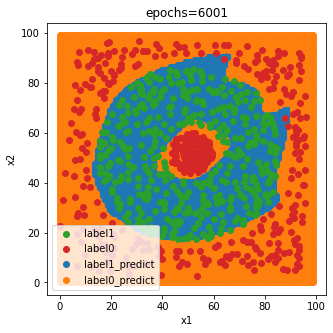

Epoch 1/500
20/20 [==============================] - 0s 736us/step - loss: 0.0714
Epoch 2/500
20/20 [==============================] - 0s 682us/step - loss: 0.0739
Epoch 3/500
20/20 [==============================] - 0s 631us/step - loss: 0.0789
Epoch 4/500
20/20 [==============================] - 0s 733us/step - loss: 0.0735
Epoch 5/500
20/20 [==============================] - 0s 682us/step - loss: 0.0721
Epoch 6/500
20/20 [==============================] - 0s 734us/step - loss: 0.0705
Epoch 7/500
20/20 [==============================] - 0s 630us/step - loss: 0.0729
Epoch 8/500
20/20 [==============================] - 0s 683us/step - loss: 0.0716
Epoch 9/500
20/20 [==============================] - 0s 682us/step - loss: 0.0716
Epoch 10/500
20/20 [==============================] - 0s 684us/step - loss: 0.0722
Epoch 11/500
20/20 [==============================] - 0s 840us/step - loss: 0.0702
Epoch 12/500
20/20 [==============================] - 0s 735us/step - loss: 0.0710
Epoch 13/500


20/20 [==============================] - 0s 631us/step - loss: 0.0693
Epoch 197/500
20/20 [==============================] - 0s 629us/step - loss: 0.0697
Epoch 198/500
20/20 [==============================] - 0s 734us/step - loss: 0.0656
Epoch 199/500
20/20 [==============================] - 0s 682us/step - loss: 0.0667
Epoch 200/500
20/20 [==============================] - 0s 681us/step - loss: 0.0647
Epoch 201/500
20/20 [==============================] - 0s 682us/step - loss: 0.0648
Epoch 202/500
20/20 [==============================] - 0s 682us/step - loss: 0.0674
Epoch 203/500
20/20 [==============================] - 0s 787us/step - loss: 0.0675
Epoch 204/500
20/20 [==============================] - 0s 735us/step - loss: 0.0676
Epoch 205/500
20/20 [==============================] - 0s 787us/step - loss: 0.0676
Epoch 206/500
20/20 [==============================] - 0s 841us/step - loss: 0.0668
Epoch 207/500
20/20 [==============================] - 0s 840us/step - loss: 0.0681
Epoch 

20/20 [==============================] - 0s 577us/step - loss: 0.0593
Epoch 391/500
20/20 [==============================] - 0s 682us/step - loss: 0.0605
Epoch 392/500
20/20 [==============================] - 0s 577us/step - loss: 0.0639
Epoch 393/500
20/20 [==============================] - 0s 631us/step - loss: 0.0651
Epoch 394/500
20/20 [==============================] - 0s 576us/step - loss: 0.0576
Epoch 395/500
20/20 [==============================] - 0s 682us/step - loss: 0.0597
Epoch 396/500
20/20 [==============================] - 0s 630us/step - loss: 0.0619
Epoch 397/500
20/20 [==============================] - 0s 630us/step - loss: 0.0629
Epoch 398/500
20/20 [==============================] - 0s 630us/step - loss: 0.0594
Epoch 399/500
20/20 [==============================] - 0s 630us/step - loss: 0.0610
Epoch 400/500
20/20 [==============================] - 0s 682us/step - loss: 0.0600
Epoch 401/500
20/20 [==============================] - 0s 733us/step - loss: 0.0597
Epoch 

20/20 [==============================] - 0s 684us/step - loss: 0.0557
Epoch 488/500
20/20 [==============================] - 0s 578us/step - loss: 0.0565
Epoch 489/500
20/20 [==============================] - 0s 577us/step - loss: 0.0563
Epoch 490/500
20/20 [==============================] - 0s 675us/step - loss: 0.0559
Epoch 491/500
20/20 [==============================] - 0s 630us/step - loss: 0.0569
Epoch 492/500
20/20 [==============================] - 0s 682us/step - loss: 0.0622
Epoch 493/500
20/20 [==============================] - 0s 630us/step - loss: 0.0601
Epoch 494/500
20/20 [==============================] - 0s 683us/step - loss: 0.0594
Epoch 495/500
20/20 [==============================] - 0s 735us/step - loss: 0.0595
Epoch 496/500
20/20 [==============================] - 0s 630us/step - loss: 0.0609
Epoch 497/500
20/20 [==============================] - 0s 630us/step - loss: 0.0614
Epoch 498/500
20/20 [==============================] - 0s 681us/step - loss: 0.0533
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

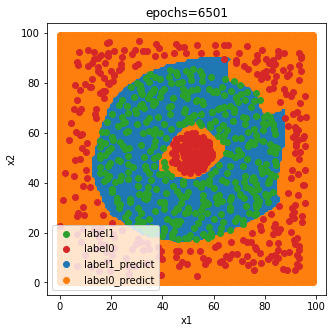

Epoch 1/500
20/20 [==============================] - 0s 735us/step - loss: 0.0551
Epoch 2/500
20/20 [==============================] - 0s 629us/step - loss: 0.0612
Epoch 3/500
20/20 [==============================] - 0s 682us/step - loss: 0.0587
Epoch 4/500
20/20 [==============================] - 0s 682us/step - loss: 0.0588
Epoch 5/500
20/20 [==============================] - 0s 630us/step - loss: 0.0538
Epoch 6/500
20/20 [==============================] - 0s 681us/step - loss: 0.0669
Epoch 7/500
20/20 [==============================] - 0s 734us/step - loss: 0.0597
Epoch 8/500
20/20 [==============================] - 0s 733us/step - loss: 0.0563
Epoch 9/500
20/20 [==============================] - 0s 684us/step - loss: 0.0572
Epoch 10/500
20/20 [==============================] - 0s 735us/step - loss: 0.0575
Epoch 11/500
20/20 [==============================] - 0s 735us/step - loss: 0.0586
Epoch 12/500
20/20 [==============================] - 0s 840us/step - loss: 0.0550
Epoch 13/500


20/20 [==============================] - 0s 629us/step - loss: 0.0517
Epoch 197/500
20/20 [==============================] - 0s 579us/step - loss: 0.0533
Epoch 198/500
20/20 [==============================] - 0s 682us/step - loss: 0.0572
Epoch 199/500
20/20 [==============================] - 0s 631us/step - loss: 0.0544
Epoch 200/500
20/20 [==============================] - 0s 578us/step - loss: 0.0526
Epoch 201/500
20/20 [==============================] - 0s 630us/step - loss: 0.0506
Epoch 202/500
20/20 [==============================] - 0s 631us/step - loss: 0.0496
Epoch 203/500
20/20 [==============================] - 0s 630us/step - loss: 0.0509
Epoch 204/500
20/20 [==============================] - 0s 735us/step - loss: 0.0542
Epoch 205/500
20/20 [==============================] - 0s 631us/step - loss: 0.0582
Epoch 206/500
20/20 [==============================] - 0s 735us/step - loss: 0.0502
Epoch 207/500
20/20 [==============================] - 0s 682us/step - loss: 0.0522
Epoch 

20/20 [==============================] - 0s 681us/step - loss: 0.0470
Epoch 391/500
20/20 [==============================] - 0s 683us/step - loss: 0.0491
Epoch 392/500
20/20 [==============================] - 0s 735us/step - loss: 0.0481
Epoch 393/500
20/20 [==============================] - 0s 630us/step - loss: 0.0485
Epoch 394/500
20/20 [==============================] - 0s 628us/step - loss: 0.0489
Epoch 395/500
20/20 [==============================] - 0s 577us/step - loss: 0.0530
Epoch 396/500
20/20 [==============================] - 0s 630us/step - loss: 0.0472
Epoch 397/500
20/20 [==============================] - 0s 682us/step - loss: 0.0457
Epoch 398/500
20/20 [==============================] - 0s 734us/step - loss: 0.0488
Epoch 399/500
20/20 [==============================] - 0s 630us/step - loss: 0.0481
Epoch 400/500
20/20 [==============================] - 0s 630us/step - loss: 0.0460
Epoch 401/500
20/20 [==============================] - 0s 630us/step - loss: 0.0464
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

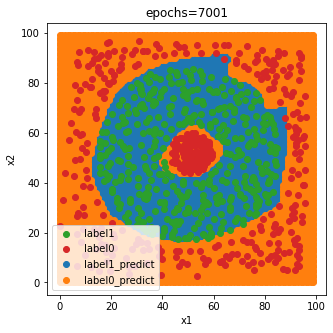

Epoch 1/500
20/20 [==============================] - 0s 735us/step - loss: 0.0454
Epoch 2/500
20/20 [==============================] - 0s 746us/step - loss: 0.0492
Epoch 3/500
20/20 [==============================] - 0s 733us/step - loss: 0.0454
Epoch 4/500
20/20 [==============================] - 0s 630us/step - loss: 0.0452
Epoch 5/500
20/20 [==============================] - 0s 682us/step - loss: 0.0462
Epoch 6/500
20/20 [==============================] - 0s 840us/step - loss: 0.0468
Epoch 7/500
20/20 [==============================] - 0s 735us/step - loss: 0.0427
Epoch 8/500
20/20 [==============================] - 0s 734us/step - loss: 0.0450
Epoch 9/500
20/20 [==============================] - 0s 683us/step - loss: 0.0480
Epoch 10/500
20/20 [==============================] - 0s 683us/step - loss: 0.0478
Epoch 11/500
20/20 [==============================] - 0s 630us/step - loss: 0.0451
Epoch 12/500
20/20 [==============================] - 0s 682us/step - loss: 0.0439
Epoch 13/500


20/20 [==============================] - 0s 630us/step - loss: 0.0433
Epoch 197/500
20/20 [==============================] - 0s 735us/step - loss: 0.0400
Epoch 198/500
20/20 [==============================] - 0s 735us/step - loss: 0.0405
Epoch 199/500
20/20 [==============================] - 0s 788us/step - loss: 0.0412
Epoch 200/500
20/20 [==============================] - 0s 735us/step - loss: 0.0410
Epoch 201/500
20/20 [==============================] - 0s 735us/step - loss: 0.0408
Epoch 202/500
20/20 [==============================] - 0s 682us/step - loss: 0.0438
Epoch 203/500
20/20 [==============================] - 0s 683us/step - loss: 0.0456
Epoch 204/500
20/20 [==============================] - 0s 683us/step - loss: 0.0411
Epoch 205/500
20/20 [==============================] - 0s 630us/step - loss: 0.0393
Epoch 206/500
20/20 [==============================] - 0s 734us/step - loss: 0.0395
Epoch 207/500
20/20 [==============================] - 0s 735us/step - loss: 0.0413
Epoch 

20/20 [==============================] - 0s 839us/step - loss: 0.0378
Epoch 391/500
20/20 [==============================] - 0s 787us/step - loss: 0.0385
Epoch 392/500
20/20 [==============================] - 0s 787us/step - loss: 0.0358
Epoch 393/500
20/20 [==============================] - 0s 892us/step - loss: 0.0382
Epoch 394/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0378
Epoch 395/500
20/20 [==============================] - 0s 1ms/step - loss: 0.0410
Epoch 396/500
20/20 [==============================] - 0s 840us/step - loss: 0.0393
Epoch 397/500
20/20 [==============================] - 0s 840us/step - loss: 0.0386
Epoch 398/500
20/20 [==============================] - 0s 841us/step - loss: 0.0385
Epoch 399/500
20/20 [==============================] - 0s 630us/step - loss: 0.0395
Epoch 400/500
20/20 [==============================] - 0s 630us/step - loss: 0.0371
Epoch 401/500
20/20 [==============================] - ETA: 0s - loss: 0.037 - 0s 787us/step -

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

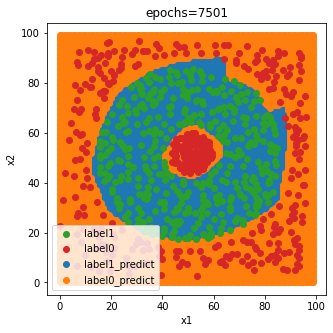

Epoch 1/500
20/20 [==============================] - 0s 736us/step - loss: 0.0399
Epoch 2/500
20/20 [==============================] - 0s 682us/step - loss: 0.0362
Epoch 3/500
20/20 [==============================] - 0s 736us/step - loss: 0.0363
Epoch 4/500
20/20 [==============================] - 0s 682us/step - loss: 0.0352
Epoch 5/500
20/20 [==============================] - 0s 735us/step - loss: 0.0389
Epoch 6/500
20/20 [==============================] - 0s 735us/step - loss: 0.0352
Epoch 7/500
20/20 [==============================] - 0s 787us/step - loss: 0.0348
Epoch 8/500
20/20 [==============================] - 0s 682us/step - loss: 0.0348
Epoch 9/500
20/20 [==============================] - 0s 683us/step - loss: 0.0383
Epoch 10/500
20/20 [==============================] - 0s 736us/step - loss: 0.0387
Epoch 11/500
20/20 [==============================] - 0s 682us/step - loss: 0.0371
Epoch 12/500
20/20 [==============================] - 0s 735us/step - loss: 0.0374
Epoch 13/500


20/20 [==============================] - 0s 631us/step - loss: 0.0368
Epoch 197/500
20/20 [==============================] - 0s 680us/step - loss: 0.0367
Epoch 198/500
20/20 [==============================] - 0s 682us/step - loss: 0.0387
Epoch 199/500
20/20 [==============================] - 0s 682us/step - loss: 0.0378
Epoch 200/500
20/20 [==============================] - 0s 630us/step - loss: 0.0373
Epoch 201/500
20/20 [==============================] - 0s 735us/step - loss: 0.0352
Epoch 202/500
20/20 [==============================] - 0s 630us/step - loss: 0.0345
Epoch 203/500
20/20 [==============================] - 0s 682us/step - loss: 0.0360
Epoch 204/500
20/20 [==============================] - 0s 630us/step - loss: 0.0333
Epoch 205/500
20/20 [==============================] - 0s 735us/step - loss: 0.0344
Epoch 206/500
20/20 [==============================] - 0s 735us/step - loss: 0.0326
Epoch 207/500
20/20 [==============================] - 0s 682us/step - loss: 0.0339
Epoch 

20/20 [==============================] - 0s 682us/step - loss: 0.0323
Epoch 391/500
20/20 [==============================] - 0s 630us/step - loss: 0.0311
Epoch 392/500
20/20 [==============================] - 0s 630us/step - loss: 0.0357
Epoch 393/500
20/20 [==============================] - 0s 630us/step - loss: 0.0342
Epoch 394/500
20/20 [==============================] - 0s 735us/step - loss: 0.0321
Epoch 395/500
20/20 [==============================] - ETA: 0s - loss: 0.022 - 0s 735us/step - loss: 0.0309
Epoch 396/500
20/20 [==============================] - 0s 733us/step - loss: 0.0355
Epoch 397/500
20/20 [==============================] - 0s 781us/step - loss: 0.0395
Epoch 398/500
20/20 [==============================] - 0s 735us/step - loss: 0.0324
Epoch 399/500
20/20 [==============================] - 0s 682us/step - loss: 0.0348
Epoch 400/500
20/20 [==============================] - 0s 735us/step - loss: 0.0321
Epoch 401/500
20/20 [==============================] - 0s 735us/st

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

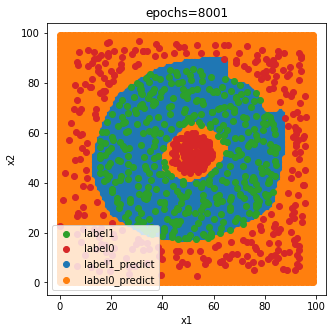

Epoch 1/500
20/20 [==============================] - 0s 735us/step - loss: 0.0313
Epoch 2/500
20/20 [==============================] - 0s 735us/step - loss: 0.0283
Epoch 3/500
20/20 [==============================] - 0s 735us/step - loss: 0.0304
Epoch 4/500
20/20 [==============================] - 0s 682us/step - loss: 0.0296
Epoch 5/500
20/20 [==============================] - 0s 735us/step - loss: 0.0299
Epoch 6/500
20/20 [==============================] - 0s 682us/step - loss: 0.0291
Epoch 7/500
20/20 [==============================] - 0s 630us/step - loss: 0.0299
Epoch 8/500
20/20 [==============================] - 0s 682us/step - loss: 0.0293
Epoch 9/500
20/20 [==============================] - 0s 630us/step - loss: 0.0288
Epoch 10/500
20/20 [==============================] - 0s 682us/step - loss: 0.0294
Epoch 11/500
20/20 [==============================] - 0s 734us/step - loss: 0.0301
Epoch 12/500
20/20 [==============================] - 0s 577us/step - loss: 0.0321
Epoch 13/500


20/20 [==============================] - 0s 630us/step - loss: 0.0275
Epoch 197/500
20/20 [==============================] - 0s 630us/step - loss: 0.0291
Epoch 198/500
20/20 [==============================] - 0s 631us/step - loss: 0.0294
Epoch 199/500
20/20 [==============================] - 0s 630us/step - loss: 0.0273
Epoch 200/500
20/20 [==============================] - 0s 630us/step - loss: 0.0269
Epoch 201/500
20/20 [==============================] - 0s 682us/step - loss: 0.0292
Epoch 202/500
20/20 [==============================] - 0s 735us/step - loss: 0.0306
Epoch 203/500
20/20 [==============================] - 0s 737us/step - loss: 0.0291
Epoch 204/500
20/20 [==============================] - 0s 630us/step - loss: 0.0276
Epoch 205/500
20/20 [==============================] - 0s 682us/step - loss: 0.0279
Epoch 206/500
20/20 [==============================] - 0s 735us/step - loss: 0.0282
Epoch 207/500
20/20 [==============================] - 0s 735us/step - loss: 0.0293
Epoch 

20/20 [==============================] - 0s 787us/step - loss: 0.0266
Epoch 294/500
20/20 [==============================] - 0s 683us/step - loss: 0.0279
Epoch 295/500
20/20 [==============================] - 0s 788us/step - loss: 0.0263
Epoch 296/500
20/20 [==============================] - 0s 683us/step - loss: 0.0250
Epoch 297/500
20/20 [==============================] - 0s 735us/step - loss: 0.0292
Epoch 298/500
20/20 [==============================] - 0s 682us/step - loss: 0.0308
Epoch 299/500
20/20 [==============================] - 0s 682us/step - loss: 0.0270
Epoch 300/500
20/20 [==============================] - 0s 684us/step - loss: 0.0269
Epoch 301/500
20/20 [==============================] - 0s 735us/step - loss: 0.0273
Epoch 302/500
20/20 [==============================] - 0s 682us/step - loss: 0.0322
Epoch 303/500
20/20 [==============================] - 0s 682us/step - loss: 0.0267
Epoch 304/500
20/20 [==============================] - 0s 658us/step - loss: 0.0267
Epoch 

20/20 [==============================] - 0s 735us/step - loss: 0.0283
Epoch 391/500
20/20 [==============================] - 0s 735us/step - loss: 0.0296
Epoch 392/500
20/20 [==============================] - ETA: 0s - loss: 0.032 - 0s 684us/step - loss: 0.0280
Epoch 393/500
20/20 [==============================] - 0s 682us/step - loss: 0.0259
Epoch 394/500
20/20 [==============================] - 0s 735us/step - loss: 0.0250
Epoch 395/500
20/20 [==============================] - 0s 630us/step - loss: 0.0264
Epoch 396/500
20/20 [==============================] - 0s 788us/step - loss: 0.0255
Epoch 397/500
20/20 [==============================] - 0s 735us/step - loss: 0.0245
Epoch 398/500
20/20 [==============================] - 0s 682us/step - loss: 0.0260
Epoch 399/500
20/20 [==============================] - 0s 682us/step - loss: 0.0278
Epoch 400/500
20/20 [==============================] - 0s 735us/step - loss: 0.0271
Epoch 401/500
20/20 [==============================] - 0s 682us/st

20/20 [==============================] - 0s 608us/step - loss: 0.0249
Epoch 488/500
20/20 [==============================] - 0s 788us/step - loss: 0.0275
Epoch 489/500
20/20 [==============================] - 0s 682us/step - loss: 0.0268
Epoch 490/500
20/20 [==============================] - 0s 682us/step - loss: 0.0264
Epoch 491/500
20/20 [==============================] - 0s 630us/step - loss: 0.0282
Epoch 492/500
20/20 [==============================] - 0s 684us/step - loss: 0.0265
Epoch 493/500
20/20 [==============================] - 0s 735us/step - loss: 0.0273
Epoch 494/500
20/20 [==============================] - 0s 669us/step - loss: 0.0253
Epoch 495/500
20/20 [==============================] - 0s 682us/step - loss: 0.0244
Epoch 496/500
20/20 [==============================] - 0s 735us/step - loss: 0.0250
Epoch 497/500
20/20 [==============================] - 0s 682us/step - loss: 0.0243
Epoch 498/500
20/20 [==============================] - 0s 736us/step - loss: 0.0257
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

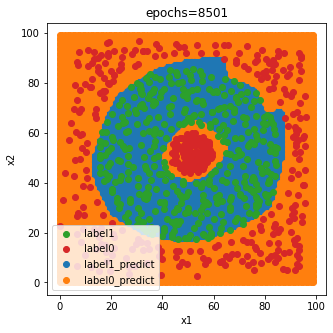

Epoch 1/500
20/20 [==============================] - 0s 683us/step - loss: 0.0288
Epoch 2/500
20/20 [==============================] - 0s 577us/step - loss: 0.0300
Epoch 3/500
20/20 [==============================] - 0s 630us/step - loss: 0.0438
Epoch 4/500
20/20 [==============================] - 0s 683us/step - loss: 0.0267
Epoch 5/500
20/20 [==============================] - 0s 682us/step - loss: 0.0244
Epoch 6/500
20/20 [==============================] - 0s 577us/step - loss: 0.0241
Epoch 7/500
20/20 [==============================] - 0s 682us/step - loss: 0.0244
Epoch 8/500
20/20 [==============================] - 0s 630us/step - loss: 0.0244
Epoch 9/500
20/20 [==============================] - 0s 630us/step - loss: 0.0268
Epoch 10/500
20/20 [==============================] - 0s 735us/step - loss: 0.0246
Epoch 11/500
20/20 [==============================] - 0s 735us/step - loss: 0.0247
Epoch 12/500
20/20 [==============================] - 0s 630us/step - loss: 0.0255
Epoch 13/500


20/20 [==============================] - 0s 630us/step - loss: 0.0245
Epoch 197/500
20/20 [==============================] - 0s 682us/step - loss: 0.0225
Epoch 198/500
20/20 [==============================] - 0s 577us/step - loss: 0.0252
Epoch 199/500
20/20 [==============================] - 0s 630us/step - loss: 0.0238
Epoch 200/500
20/20 [==============================] - 0s 682us/step - loss: 0.0210
Epoch 201/500
20/20 [==============================] - 0s 682us/step - loss: 0.0235
Epoch 202/500
20/20 [==============================] - 0s 787us/step - loss: 0.0224
Epoch 203/500
20/20 [==============================] - 0s 682us/step - loss: 0.0231
Epoch 204/500
20/20 [==============================] - 0s 735us/step - loss: 0.0228
Epoch 205/500
20/20 [==============================] - 0s 682us/step - loss: 0.0247
Epoch 206/500
20/20 [==============================] - 0s 735us/step - loss: 0.0250
Epoch 207/500
20/20 [==============================] - 0s 735us/step - loss: 0.0291
Epoch 

20/20 [==============================] - 0s 629us/step - loss: 0.0250
Epoch 390/500
20/20 [==============================] - 0s 682us/step - loss: 0.0241
Epoch 391/500
20/20 [==============================] - 0s 787us/step - loss: 0.0226
Epoch 392/500
20/20 [==============================] - 0s 577us/step - loss: 0.0231
Epoch 393/500
20/20 [==============================] - 0s 630us/step - loss: 0.0228
Epoch 394/500
20/20 [==============================] - 0s 682us/step - loss: 0.0231
Epoch 395/500
20/20 [==============================] - 0s 735us/step - loss: 0.0254
Epoch 396/500
20/20 [==============================] - 0s 682us/step - loss: 0.0258
Epoch 397/500
20/20 [==============================] - 0s 525us/step - loss: 0.0258
Epoch 398/500
20/20 [==============================] - 0s 630us/step - loss: 0.0215
Epoch 399/500
20/20 [==============================] - 0s 682us/step - loss: 0.0217
Epoch 400/500
20/20 [==============================] - 0s 682us/step - loss: 0.0224
Epoch 

20/20 [==============================] - 0s 625us/step - loss: 0.0195
Epoch 487/500
20/20 [==============================] - 0s 682us/step - loss: 0.0229
Epoch 488/500
20/20 [==============================] - 0s 630us/step - loss: 0.0211
Epoch 489/500
20/20 [==============================] - 0s 682us/step - loss: 0.0223
Epoch 490/500
20/20 [==============================] - 0s 630us/step - loss: 0.0198
Epoch 491/500
20/20 [==============================] - 0s 629us/step - loss: 0.0208
Epoch 492/500
20/20 [==============================] - 0s 787us/step - loss: 0.0219
Epoch 493/500
20/20 [==============================] - 0s 787us/step - loss: 0.0222
Epoch 494/500
20/20 [==============================] - 0s 787us/step - loss: 0.0206
Epoch 495/500
20/20 [==============================] - 0s 682us/step - loss: 0.0205
Epoch 496/500
20/20 [==============================] - 0s 735us/step - loss: 0.0227
Epoch 497/500
20/20 [==============================] - 0s 629us/step - loss: 0.0213
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

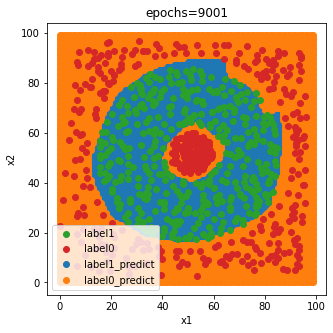

Epoch 1/500
20/20 [==============================] - 0s 735us/step - loss: 0.0221
Epoch 2/500
20/20 [==============================] - 0s 735us/step - loss: 0.0211
Epoch 3/500
20/20 [==============================] - 0s 684us/step - loss: 0.0219
Epoch 4/500
20/20 [==============================] - 0s 682us/step - loss: 0.0215
Epoch 5/500
20/20 [==============================] - 0s 735us/step - loss: 0.0234
Epoch 6/500
20/20 [==============================] - 0s 682us/step - loss: 0.0234
Epoch 7/500
20/20 [==============================] - 0s 735us/step - loss: 0.0209
Epoch 8/500
20/20 [==============================] - 0s 735us/step - loss: 0.0204
Epoch 9/500
20/20 [==============================] - 0s 682us/step - loss: 0.0210
Epoch 10/500
20/20 [==============================] - 0s 997us/step - loss: 0.0233
Epoch 11/500
20/20 [==============================] - 0s 840us/step - loss: 0.0264
Epoch 12/500
20/20 [==============================] - 0s 682us/step - loss: 0.0240
Epoch 13/500


20/20 [==============================] - 0s 525us/step - loss: 0.0240
Epoch 197/500
20/20 [==============================] - 0s 577us/step - loss: 0.0215
Epoch 198/500
20/20 [==============================] - ETA: 0s - loss: 0.021 - 0s 682us/step - loss: 0.0228
Epoch 199/500
20/20 [==============================] - 0s 683us/step - loss: 0.0238
Epoch 200/500
20/20 [==============================] - 0s 630us/step - loss: 0.0191
Epoch 201/500
20/20 [==============================] - 0s 630us/step - loss: 0.0198
Epoch 202/500
20/20 [==============================] - 0s 630us/step - loss: 0.0203
Epoch 203/500
20/20 [==============================] - 0s 630us/step - loss: 0.0209
Epoch 204/500
20/20 [==============================] - 0s 683us/step - loss: 0.0233
Epoch 205/500
20/20 [==============================] - 0s 630us/step - loss: 0.0212
Epoch 206/500
20/20 [==============================] - 0s 577us/step - loss: 0.0207
Epoch 207/500
20/20 [==============================] - 0s 630us/st

20/20 [==============================] - 0s 630us/step - loss: 0.0176
Epoch 391/500
20/20 [==============================] - 0s 577us/step - loss: 0.0203
Epoch 392/500
20/20 [==============================] - 0s 659us/step - loss: 0.0196
Epoch 393/500
20/20 [==============================] - 0s 630us/step - loss: 0.0206
Epoch 394/500
20/20 [==============================] - 0s 631us/step - loss: 0.0177
Epoch 395/500
20/20 [==============================] - 0s 630us/step - loss: 0.0168
Epoch 396/500
20/20 [==============================] - 0s 630us/step - loss: 0.0184
Epoch 397/500
20/20 [==============================] - 0s 630us/step - loss: 0.0186
Epoch 398/500
20/20 [==============================] - 0s 578us/step - loss: 0.0189
Epoch 399/500
20/20 [==============================] - 0s 577us/step - loss: 0.0185
Epoch 400/500
20/20 [==============================] - 0s 577us/step - loss: 0.0174
Epoch 401/500
20/20 [==============================] - 0s 630us/step - loss: 0.0181
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

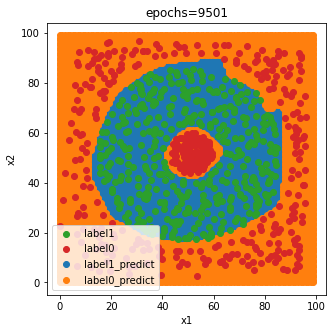

Epoch 1/500
20/20 [==============================] - 0s 630us/step - loss: 0.0174
Epoch 2/500
20/20 [==============================] - 0s 577us/step - loss: 0.0162
Epoch 3/500
20/20 [==============================] - 0s 630us/step - loss: 0.0167
Epoch 4/500
20/20 [==============================] - 0s 682us/step - loss: 0.0189
Epoch 5/500
20/20 [==============================] - 0s 683us/step - loss: 0.0177
Epoch 6/500
20/20 [==============================] - 0s 787us/step - loss: 0.0177
Epoch 7/500
20/20 [==============================] - 0s 840us/step - loss: 0.0194
Epoch 8/500
20/20 [==============================] - 0s 735us/step - loss: 0.0187
Epoch 9/500
20/20 [==============================] - 0s 735us/step - loss: 0.0185
Epoch 10/500
20/20 [==============================] - 0s 630us/step - loss: 0.0168
Epoch 11/500
20/20 [==============================] - 0s 682us/step - loss: 0.0179
Epoch 12/500
20/20 [==============================] - 0s 630us/step - loss: 0.0192
Epoch 13/500


20/20 [==============================] - 0s 576us/step - loss: 0.0154
Epoch 197/500
20/20 [==============================] - 0s 630us/step - loss: 0.0181
Epoch 198/500
20/20 [==============================] - 0s 577us/step - loss: 0.0191
Epoch 199/500
20/20 [==============================] - 0s 630us/step - loss: 0.0214
Epoch 200/500
20/20 [==============================] - 0s 683us/step - loss: 0.0189
Epoch 201/500
20/20 [==============================] - 0s 630us/step - loss: 0.0187
Epoch 202/500
20/20 [==============================] - 0s 630us/step - loss: 0.0170
Epoch 203/500
20/20 [==============================] - 0s 629us/step - loss: 0.0159
Epoch 204/500
20/20 [==============================] - 0s 682us/step - loss: 0.0152
Epoch 205/500
20/20 [==============================] - 0s 630us/step - loss: 0.0167
Epoch 206/500
20/20 [==============================] - 0s 631us/step - loss: 0.0155
Epoch 207/500
20/20 [==============================] - 0s 630us/step - loss: 0.0163
Epoch 

20/20 [==============================] - 0s 630us/step - loss: 0.0170
Epoch 391/500
20/20 [==============================] - 0s 630us/step - loss: 0.0163
Epoch 392/500
20/20 [==============================] - 0s 735us/step - loss: 0.0153
Epoch 393/500
20/20 [==============================] - 0s 682us/step - loss: 0.0153
Epoch 394/500
20/20 [==============================] - 0s 735us/step - loss: 0.0147
Epoch 395/500
20/20 [==============================] - 0s 682us/step - loss: 0.0145
Epoch 396/500
20/20 [==============================] - 0s 787us/step - loss: 0.0167
Epoch 397/500
20/20 [==============================] - 0s 630us/step - loss: 0.0153
Epoch 398/500
20/20 [==============================] - 0s 630us/step - loss: 0.0148
Epoch 399/500
20/20 [==============================] - 0s 845us/step - loss: 0.0146
Epoch 400/500
20/20 [==============================] - 0s 788us/step - loss: 0.0150
Epoch 401/500
20/20 [==============================] - 0s 682us/step - loss: 0.0155
Epoch 

C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\zheng\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

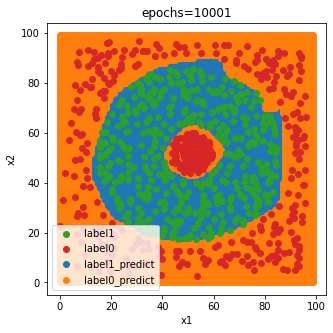

In [15]:
#逐步迭代及结果可视化
accuracy_train = []
accuracy_test = []
for i in range(0,21):
    #train the model
    if i == 0:
        mlp.fit(X_train,y_train,epochs=1)
    else:
        mlp.fit(X_train,y_train,epochs=500)
    #make prediction and calculate the accuracy
    y_train_predict = mlp.predict_classes(X_train)
    accuracy_train_i = accuracy_score(y_train,y_train_predict)
    #make prediction based on the test data
    y_test_predict = mlp.predict_classes(X_test)
    accuracy_test_i = accuracy_score(y_test,y_test_predict)  
    accuracy_train.append(accuracy_train_i)
    accuracy_test.append(accuracy_test_i)
    
    #generate new data for plot
    xx, yy = np.meshgrid(np.arange(0,100,1),np.arange(0,100,1))
    x_range = np.c_[xx.ravel(),yy.ravel()]
    y_range_predict = mlp.predict_classes(x_range)
    #format the output
    y_range_predict_form = pd.Series(i[0] for i in y_range_predict)

    fig_i = plt.figure(figsize=(5,5))
    label1_predict=plt.scatter(x_range[:,0][y_range_predict_form==1],x_range[:,1][y_range_predict_form==1])
    label0_predict=plt.scatter(x_range[:,0][y_range_predict_form==0],x_range[:,1][y_range_predict_form==0])
    label1=plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
    label0=plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
    plt.legend((label1,label0,label1_predict,label0_predict),('label1','label0','label1_predict','label0_predict'))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('epochs={}'.format(1+i*500))
    plt.show()
    fig_i.savefig('2d_output/{}.png'.format(i),dpi=500,bbox_inches = 'tight')    

In [16]:
n = [1+i*500 for i in range(0,21)]
print(n)

[1, 501, 1001, 1501, 2001, 2501, 3001, 3501, 4001, 4501, 5001, 5501, 6001, 6501, 7001, 7501, 8001, 8501, 9001, 9501, 10001]


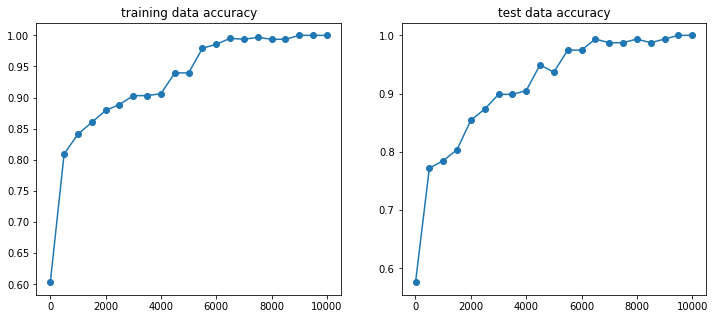

In [17]:
fig3 = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(n,accuracy_train,marker='o')
plt.title('training data accuracy')

plt.subplot(122)
plt.plot(n,accuracy_test,marker='o')
plt.title('test data accuracy')
plt.show()

In [18]:
print(accuracy_test)

[0.5759493670886076, 0.7721518987341772, 0.7848101265822784, 0.8037974683544303, 0.8544303797468354, 0.8734177215189873, 0.8987341772151899, 0.8987341772151899, 0.9050632911392406, 0.9493670886075949, 0.9367088607594937, 0.9746835443037974, 0.9746835443037974, 0.9936708860759493, 0.9873417721518988, 0.9873417721518988, 0.9936708860759493, 0.9873417721518988, 0.9936708860759493, 1.0, 1.0]
